In [1]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
from mssfp.phantoms import simple, phantom, shepp_logan

In [2]:
print(simple.tissue_parameters)

{0: ('none', 0, 0, 0), 1: ('csf', 4.2, 1.99, 0), 2: ('gray-matter', 0.9, 0.1, 0), 3: ('white-matter', 0.6, 0.08, 0), 4: ('muscle', 0.9, 0.05, 0), 5: ('liver', 0.5, 0.04, 0), 6: ('fat', 0.25, 0.07, 420), 7: ('tendon', 0.4, 0.005, 0), 8: ('proteins', 0.25, 0.001, 0)}


In [3]:
dataset = phantom.generate_ssfp_dataset(phantom_type='block', shape=256, ids=[1, 2, 3, 4], padding=8, f=100, df=1/3e-3)

Generating fieldmap: (-233.33333333333331, 433.3333333333333, 256)


  0%|          | 0/1 [00:00<?, ?it/s]/Users/michael/projects/imperial/mssfp/mssfp/simulations/ssfp.py:64: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
/Users/michael/projects/imperial/mssfp/mssfp/simulations/ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
/Users/michael/projects/imperial/mssfp/mssfp/simulations/ssfp.py:91: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)
100%|██████████| 1/1 [00:00<00:00, 18.73it/s]


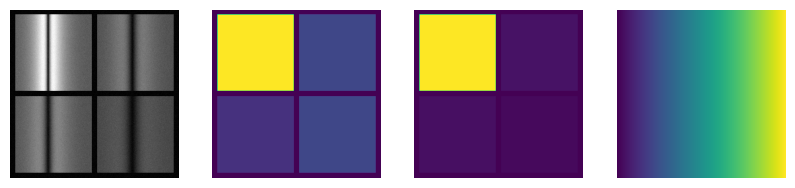

In [ ]:
slice = 0

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(np.abs(dataset['M'][0,:,:,1]), cmap='gray')
plt.axis('off')
plt.subplot(1,5,2)
plt.imshow(dataset['M'][slice, :, :, 1].real, cmap='gray')
plt.axis('off')
plt.subplot(1,5,3)
plt.imshow(dataset['t1'])
plt.axis('off')
plt.subplot(1,5,4)
plt.imshow(dataset['t2'])
plt.axis('off')
plt.subplot(1,5,5)
plt.imshow(dataset['fieldmap'])
plt.axis('off')
plt.show()

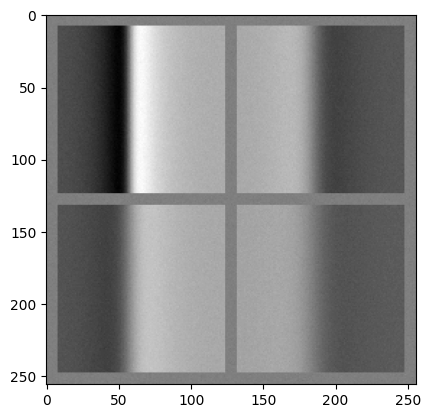

In [ ]:
plt.imshow(dataset['M'][slice, :, :, 1].real, cmap='gray')
plt.show()

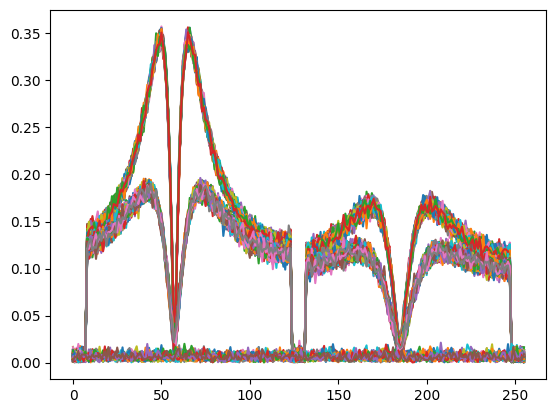

In [6]:
Mslice = dataset['M'][0,:,:,1].T
plt.plot(np.abs(Mslice))
plt.show()

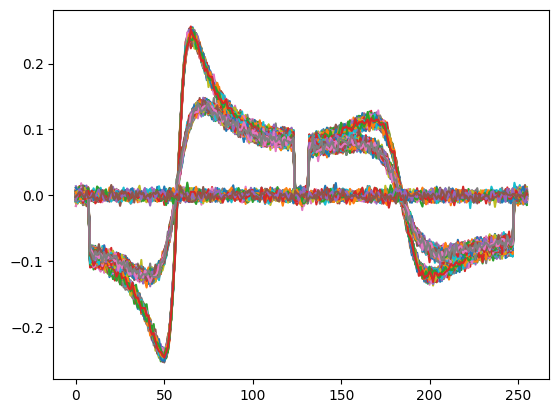

In [7]:
Mslice = dataset['M'][0,:,:,1].T
plt.plot(Mslice.real)
plt.show()

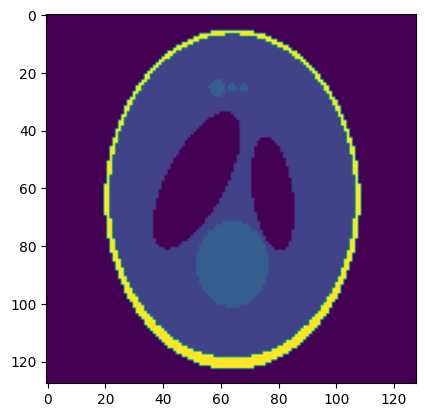

In [8]:
phantom = shepp_logan.generate_shepp_logan(128)
phantom.shape
plt.imshow(phantom)
plt.show()